In [1]:
%matplotlib inline
import dask
import dask.multiprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.external.tifffile as tif
%load_ext autoreload
%autoreload 2
from peaks.peakfinder import PeakFinder
import skimage.external.tifffile as tif
from matplotlib.colors import LogNorm, PowerNorm

In [2]:
from pyPALM.drift import extract_fiducials, find_fiducials, palm_hist

In [3]:
import tqdm

In [4]:
data = tif.imread("Z Calibration/Cell5_532nm_Calib.tif") # - tif.imread("Camera Calibration/dark_wo_1st_512x512_mean.tif")

C:\Users\hoffmand\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:2128: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


In [6]:
fittypes = ("mle", "ls")
win_d = (9,11,13,15,17,19)
zcalib = {fittype: {win:pd.read_hdf("z_calib3_unweighted.h5", "psf_nb/{}/win{}".format(fittype, win)) for win in win_d}
          for fittype in fittypes}

In [7]:
zcalib['ls'][9]

,ellip,sigma_x,sigma_y,x0,y0
coefs,,,,,
0,2.848133e-19,1.802886e-10,8.556682e-12,3.426335e-11,-4.653397e-11
1,-3.588496e-18,8.968642e-10,2.603611e-09,-9.682111e-10,1.151435e-09
2,-8.921502e-16,9.313826e-08,2.793439e-07,5.075502e-08,1.619875e-07
3,-2.515305e-14,-5.393900e-06,7.198502e-06,1.156010e-06,4.900112e-07
4,3.232009e-13,2.876523e-04,2.409318e-04,5.229344e-05,3.494331e-05
5,1.120631e-10,-6.782920e-03,7.723620e-03,-4.336262e-03,-6.449061e-04
6,2.888546e-09,1.206757e+00,1.175553e+00,-7.744298e-02,-8.560059e-02
7,-8.536582e-08,NaN,NaN,NaN,NaN
8,-4.907093e-06,NaN,NaN,NaN,NaN


In [8]:
from peaks.stackanalysis import PSFStackAnalyzer

(<matplotlib.figure.Figure at 0x24ae880ca20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24ade092cc0>)

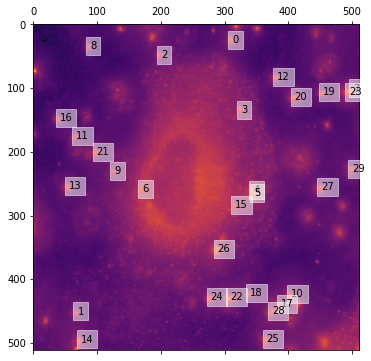

In [9]:
pf = PSFStackAnalyzer(data, 1.4)
pf.peakfinder.find_blobs()
pf.peakfinder.remove_edge_blobs(11)
pf.peakfinder.plot_blobs(cmap="inferno", norm=PowerNorm(0.25))

In [10]:
len(pf.peakfinder.blobs)

30

In [11]:
pf.fitPeaks(11, 30, fittype="ls")

[               amp         amp_e       noise      offset     offset_e  \
 slice                                                                   
 0      2469.479400  4.934660e+01         NaN  409.016662    19.935439   
 1      2201.577517  5.038504e+01  123.230605  432.248335    20.064836   
 2      2129.241013  5.073595e+01  126.691597  426.224024    21.175780   
 3      1944.625936  4.873530e+01  126.615867  410.222558    22.890351   
 4      1824.587183  4.701698e+01  126.265768  389.341404    24.540042   
 5      1647.277909  4.582353e+01  125.909235  395.606044    26.427589   
 6      1608.090145  4.584894e+01  129.111139  365.505440    29.822983   
 7      1466.701065  4.810604e+01  136.763316  373.471130    33.809121   
 8      1424.867712  5.278421e+01  146.490077  302.576704    47.609930   
 9      1373.344925  5.814266e+01  155.733714  301.985968    56.207414   
 10     1286.055364  5.409169e+01  145.017423  328.470964    52.430040   
 11     1262.126015  6.726632e+01  146

In [12]:
pf.calc_psf_params()

,SNR,amp,amp_e,noise,offset,offset_e,sigma_x,sigma_x_e,sigma_y,sigma_y_e,sigma_z,sigma_z_e,x0,x0_e,y0,y0_e,z0,z0_e
peak_num,,,,,,,,,,,,,,,,,,
1,33.648362,4187.704459,7.369206e+02,50.789919,228.051646,100.792673,1.208459,0.010223,1.197311,0.010129,19.941279,0.024780,66.527222,0.009713,453.360567,0.009623,96.017977,0.020289
2,35.251408,3613.155730,4.962468e+02,37.644312,188.348460,62.836380,1.194180,0.008617,1.175870,0.008486,19.725668,0.021911,197.574002,0.008203,49.542458,0.008077,122.910574,0.018585
3,31.296410,4875.933025,1.179214e+03,73.639359,313.410957,202.500408,1.233210,0.012425,1.203637,0.012129,20.251509,0.030678,323.703960,0.011786,135.521001,0.011502,63.098732,0.023672
4,96.182794,45404.256609,5.068712e+10,530.335383,-139.950432,60584.883854,2.300938,0.151296,3.882449,0.244170,190.021449,30635.771544,343.096876,0.069874,265.602190,0.134851,-413.919162,650519.582359
5,83.078026,39165.380538,3.035582e+10,527.286404,-135.747505,57621.740407,2.239324,0.142306,3.862386,0.242430,185.234102,26019.877019,343.126182,0.069680,265.738714,0.141155,-390.972684,523496.294254
7,10.691267,13644.932531,8.216224e+04,131.834650,1897.687056,8578.967511,1.215831,0.007471,1.206773,0.007411,17.889211,0.207965,492.632445,0.007092,107.949959,0.007037,135.504922,0.178476
8,27.877895,4757.081206,1.589338e+03,45.022408,206.847537,233.649635,1.194752,0.008010,1.181749,0.007920,21.576685,0.192578,87.456284,0.007622,36.743441,0.007539,10.199572,0.243272
9,27.918886,5341.227829,3.863679e+03,79.133754,283.217302,309.472075,1.185047,0.012148,1.172028,0.012012,20.972834,0.326511,125.488577,0.011571,231.716808,0.011445,4.945311,0.619992
10,27.261871,8976.507842,6.529391e+04,79.839341,316.277823,677.738935,1.229330,0.007775,1.183087,0.007480,25.618725,1.078876,401.546681,0.007385,424.944313,0.007108,-4.474375,3.533727


In [13]:
temp_peaks = pf.psf_params[(pf.psf_params.z0 > 0) & (pf.psf_params.noise < 100) & (pf.psf_params.z0_e < 0.1)]
temp_peaks

,SNR,amp,amp_e,noise,offset,offset_e,sigma_x,sigma_x_e,sigma_y,sigma_y_e,sigma_z,sigma_z_e,x0,x0_e,y0,y0_e,z0,z0_e
peak_num,,,,,,,,,,,,,,,,,,
1,33.648362,4187.704459,736.920571,50.789919,228.051646,100.792673,1.208459,0.010223,1.197311,0.010129,19.941279,0.024780,66.527222,0.009713,453.360567,0.009623,96.017977,0.020289
2,35.251408,3613.155730,496.246783,37.644312,188.348460,62.836380,1.194180,0.008617,1.175870,0.008486,19.725668,0.021911,197.574002,0.008203,49.542458,0.008077,122.910574,0.018585
3,31.296410,4875.933025,1179.213907,73.639359,313.410957,202.500408,1.233210,0.012425,1.203637,0.012129,20.251509,0.030678,323.703960,0.011786,135.521001,0.011502,63.098732,0.023672
11,40.155169,4218.742979,541.087430,47.418005,221.498394,89.779455,1.172785,0.009148,1.153800,0.009002,19.435126,0.017480,65.207192,0.008733,178.305527,0.008590,121.864130,0.014105
12,37.338184,5832.124607,1181.711712,73.328050,291.635204,144.505600,1.220631,0.010288,1.183874,0.009982,19.264446,0.018898,379.826165,0.009778,85.405743,0.009484,131.902083,0.016125
13,40.563566,6251.849898,1164.086652,73.670564,343.995414,180.224188,1.195033,0.009763,1.169918,0.009553,19.774908,0.017302,53.460014,0.009297,255.849876,0.009101,124.427732,0.014007
14,30.990489,10211.617316,5375.795610,90.829773,408.976098,757.401639,1.228353,0.007465,1.172785,0.007126,21.345462,0.040015,71.686857,0.007095,497.226672,0.006774,32.724535,0.028999
16,40.472422,5904.695290,1038.837146,69.235575,256.852804,129.572739,1.194812,0.009760,1.165552,0.009519,19.425543,0.016478,39.102535,0.009301,149.990268,0.009073,97.745880,0.013613
17,35.209515,6828.359934,1793.337476,67.269043,316.901239,218.748282,1.207382,0.008300,1.183756,0.008138,19.847698,0.022183,385.845318,0.007895,441.138943,0.007742,87.293298,0.018313


In [14]:
fids_to_find = temp_peaks[["y0", "x0"]].values

In [15]:
def fit_frame(data, frame, fit_width=11, bg=15, zcalib=None, fittype="ls"):
    """Fit a single frame of data
    
    Parameters
    ----------
    data : ndarray (2D)
        the data to find and fit peaks
    frame"""
    pf = PeakFinder(data, 1.4, bg)
#     test_pf.thresh = 10
    pf.find_blobs()
    if len(pf.blobs):
        pf.blobs = pf.blobs[:100]
    pf.remove_edge_blobs(10)
    pf_fits = pf.fit_blobs(width=fit_width, poly_coefs_df=zcalib, fittype=fittype, quiet=True)
    pf_fits["frame"]=frame
    return pf_fits

In [16]:
from dask.diagnostics import ProgressBar
pb = ProgressBar()
pb.register()

In [17]:
zcalib["mle"][9].dropna()

,ellip,sigma_x,sigma_y,x0,y0
coefs,,,,,
0,2.846725e-19,1.804369e-10,8.830161e-12,3.425499e-11,-4.656019e-11
1,-3.591123e-18,8.980321e-10,2.606774e-09,-9.683832e-10,1.152094e-09
2,-8.913367e-16,9.285178e-08,2.788714e-07,5.075755e-08,1.620261e-07
3,-2.514119e-14,-5.395410e-06,7.194671e-06,1.156133e-06,4.892266e-07
4,3.214680e-13,2.878110e-04,2.411564e-04,5.229913e-05,3.493236e-05
5,1.120447e-10,-6.782475e-03,7.724622e-03,-4.336041e-03,-6.445846e-04
6,2.890190e-09,1.206735e+00,1.175529e+00,-7.732289e-02,-8.557163e-02


In [18]:
fits = {"zcalib" : {}, "ellip" : {}}
for k, v in fits.items():
    for fittype in fittypes:
        vv = v[fittype] = {}
        for win in win_d:
            if k == "zcalib":
                z = zcalib[fittype][win].dropna()
            else:
                z = None
#                 continue
            to_compute = dask.delayed([dask.delayed(fit_frame)(d, i, zcalib=z, fittype=fittype, fit_width=win) for i, d in enumerate(data)])
            vv[win] = pd.concat(to_compute.compute(get=dask.multiprocessing.get, num_workers=24)).dropna()

[########################################] | 100% Completed | 59.8s
[########################################] | 100% Completed |  1min 32.4s
[########################################] | 100% Completed |  1min 25.8s
[########################################] | 100% Completed | 45.0s
[########################################] | 100% Completed | 43.7s
[########################################] | 100% Completed | 41.9s
[########################################] | 100% Completed | 29.4s
[########################################] | 100% Completed | 46.1s
[########################################] | 100% Completed | 40.6s
[########################################] | 100% Completed | 22.2s
[########################################] | 100% Completed | 22.1s
[########################################] | 100% Completed | 22.9s
[########################################] | 100% Completed |  1min  9.5s
[########################################] | 100% Completed |  1min 19.3s
[#######################

In [19]:
from peaks.utils import find_real_roots_near_zero

In [20]:
from scipy.interpolate import interp1d

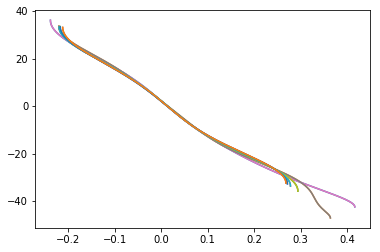

In [21]:
for fittype, win_data in zcalib.items():
    for win, calib in win_data.items():
        poly = np.poly1d(calib.ellip)
        polyd = poly.deriv()

        xmin, xmax = find_real_roots_near_zero(polyd)
        x = np.linspace(xmin, xmax, 1024)
        y = poly(x)
        plt.plot(y, x)

        f = interp1d(y, x, bounds_error=False)
        
        fit = fits["ellip"][fittype][win]
        fit["z0"] = f((fit.sigma_x - fit.sigma_y)/(fit.sigma_x + fit.sigma_y))

In [22]:
fids = {ztype:
    {fittype:
        {win: extract_fiducials(fit, fids_to_find, 1)
            for win, fit in win_dict.items()
        }
        for fittype, win_dict in fittype_dict.items()
    }
    for ztype, fittype_dict in fits.items()
}

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [23]:
import seaborn as sns

In [24]:
sns.set()

In [25]:
from peaks.utils import gauss_fit, gauss

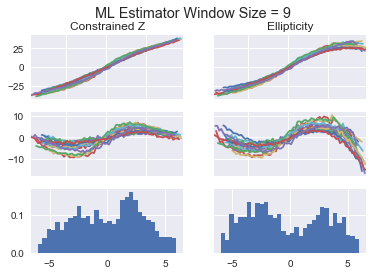

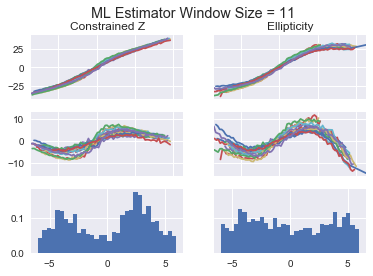

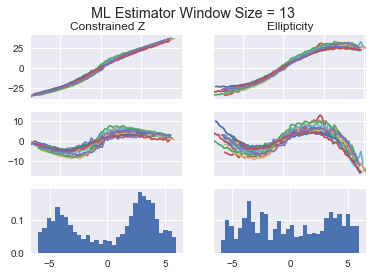

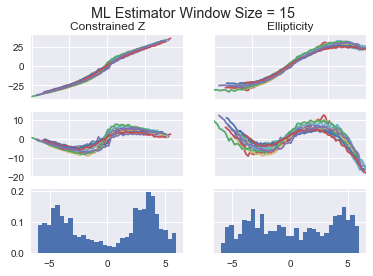

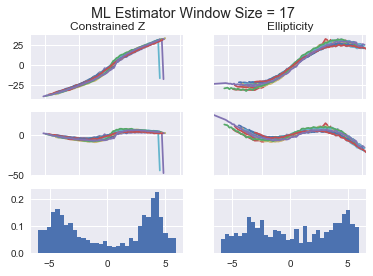

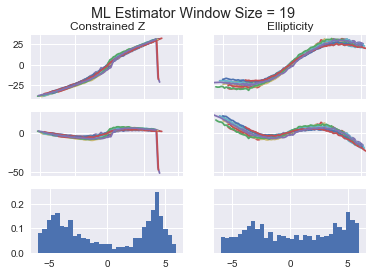

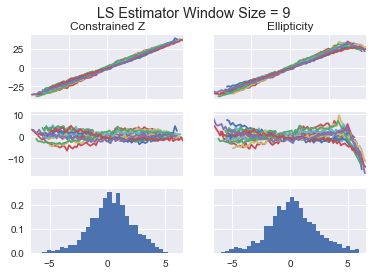

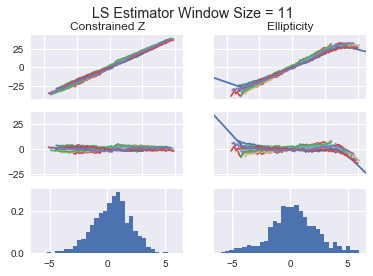

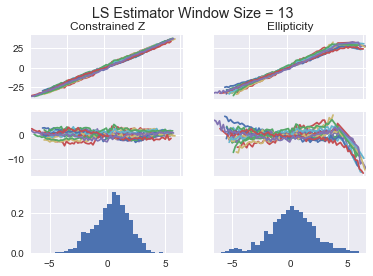

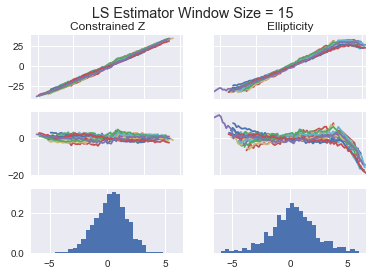

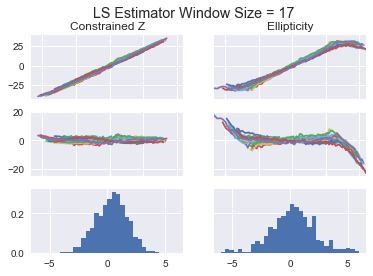

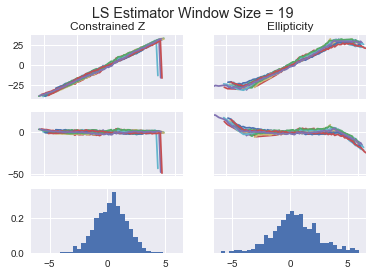

In [ ]:
for fittype in fittypes:
    for win in win_d:
        fig, axs = plt.subplots(3, 2, sharex="row", sharey="row")
        (ax0, ax1) = axs.T
        for ff, ax in ((fids["zcalib"][fittype][win], ax0), (fids["ellip"][fittype][win], ax1)):
            l = []
            for i, f in enumerate(ff):
                f = f[(f.amp > 1000) & (np.abs(f.z0 ) < 40) & (f.SNR > 15)]
                z0 = gauss_fit(f.index.values, f.amp.values, False)[0][1]
                f.index -= z0
                f = f[abs(f.index) < 50]
                if len(f):
                    (f.z0).plot(ax=ax[0])
                    (f.z0 - f.index).plot(ax=ax[1])
                    l.append(f.z0 - f.index)
            ax[2].hist(np.concatenate(l), normed=True, bins=np.linspace(-6,6, 33))

        for t, ax in (("Constrained Z", ax0[0]), ("Ellipticity", ax1[0])):
            ax.set_title(t)
        fig.suptitle("{} Estimator Window Size = {}".format(fittype.upper()[:2], win))

## Cross check

In [35]:
fits_cross = {"zcalib" : {}, "ellip" : {}}
for k, v in fits_cross.items():
    for fittype in fittypes:
        vv = v[fittype] = {}
        for win in win_d:
            if k == "zcalib":
                z = zcalib["ls"][19].dropna()
            else:
                z = None
#                 continue
            to_compute = dask.delayed([dask.delayed(fit_frame)(d, i, zcalib=z, fittype=fittype, fit_width=win) for i, d in enumerate(data)])
            vv[win] = pd.concat(to_compute.compute(get=dask.multiprocessing.get, num_workers=24)).dropna()

[########################################] | 100% Completed | 35.1s
[########################################] | 100% Completed | 39.2s
[########################################] | 100% Completed | 39.2s
[########################################] | 100% Completed | 39.7s
[########################################] | 100% Completed | 40.0s
[########################################] | 100% Completed | 40.7s
[########################################] | 100% Completed | 19.9s
[########################################] | 100% Completed | 20.5s
[########################################] | 100% Completed | 21.4s
[########################################] | 100% Completed | 22.1s
[########################################] | 100% Completed | 22.0s
[########################################] | 100% Completed | 23.0s
[########################################] | 100% Completed |  1min  4.2s
[########################################] | 100% Completed |  1min 13.0s
[###################################

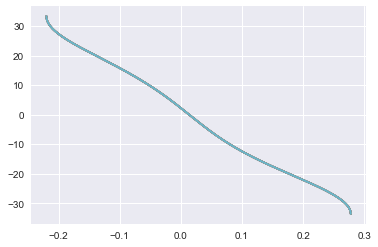

In [36]:
for fittype, win_data in zcalib.items():
    for win, calib in win_data.items():
        poly = np.poly1d(zcalib[fittype][15].ellip.values)
        polyd = poly.deriv()

        xmin, xmax = find_real_roots_near_zero(polyd)
        x = np.linspace(xmin, xmax, 1024)
        y = poly(x)
        plt.plot(y, x)

        f = interp1d(y, x, bounds_error=False)
        
        fit = fits_cross["ellip"][fittype][win]
        fit["z0"] = f((fit.sigma_x - fit.sigma_y)/(fit.sigma_x + fit.sigma_y))

In [37]:
fids_cross = {ztype:
    {fittype:
        {win: extract_fiducials(fit, fids_to_find, 1)
            for win, fit in win_dict.items()
        }
        for fittype, win_dict in fittype_dict.items()
    }
    for ztype, fittype_dict in fits_cross.items()
}

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

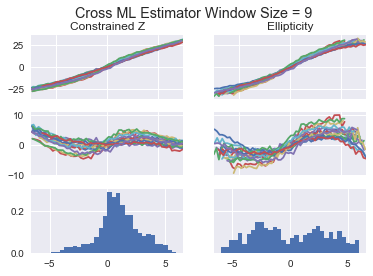

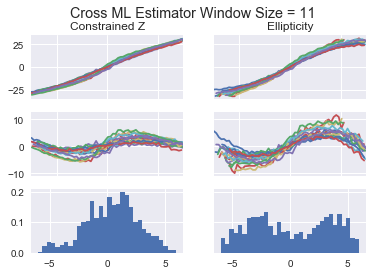

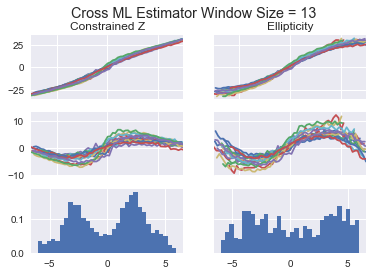

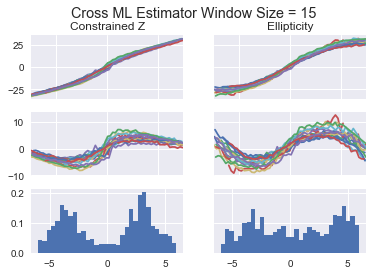

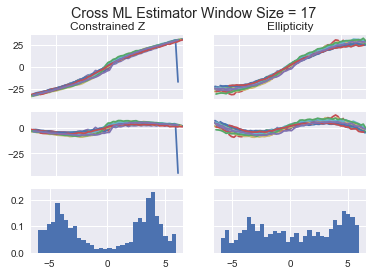

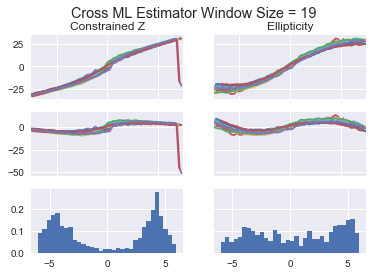

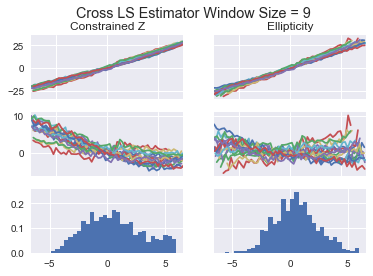

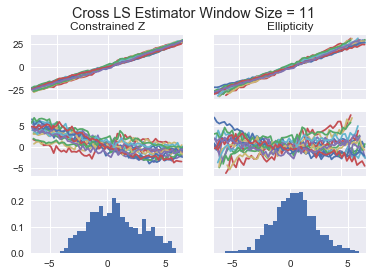

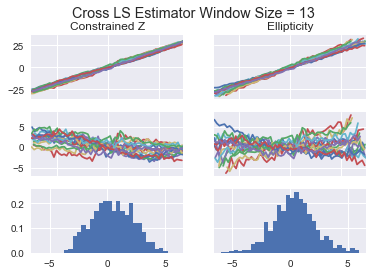

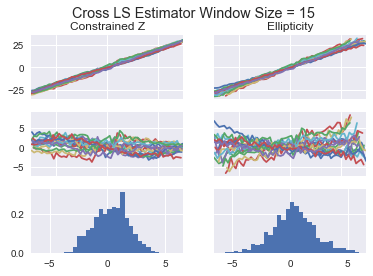

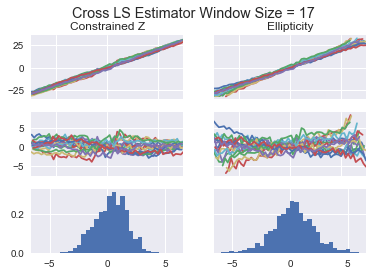

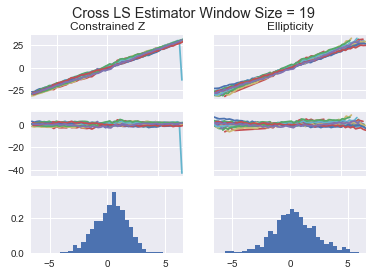

In [38]:
for fittype in fittypes:
    for win in win_d:
        fig, axs = plt.subplots(3, 2, sharex="row", sharey="row")
        (ax0, ax1) = axs.T
        for ff, ax in ((fids_cross["zcalib"][fittype][win], ax0), (fids_cross["ellip"][fittype][win], ax1)):
            l = []
            for i, f in enumerate(ff):
                f = f[(f.amp > 1000) & (np.abs(f.z0 ) < 40) & (f.SNR > 15)]
                z0 = gauss_fit(f.index.values, f.amp.values, False)[0][1]
                f.index -= z0
                f = f[abs(f.index) < 30]
                if len(f):
                    (f.z0).plot(ax=ax[0])
                    (f.z0 - f.index).plot(ax=ax[1])
                    l.append(f.z0 - f.index)
            ax[2].hist(np.concatenate(l), normed=True, bins=np.linspace(-6, 6, 33))

        for t, ax in (("Constrained Z", ax0[0]), ("Ellipticity", ax1[0])):
            ax.set_title(t)
        fig.suptitle("Cross {} Estimator Window Size = {}".format(fittype.upper()[:2], win))

# Testing 1, 2, 3

In [309]:
from peaks.gauss2d import Gauss2Dz, Gauss2D

In [310]:
def gen_model(self, *args):
    """
    A helper method to generate a fit if needed, useful for generating
    residuals

    Parameters
    ----------
    *args : tuple
        passed directly to `model`

    Returns
    -------
    out : ndarray
        Fit generated by the model.
    """
    # generate data grid
    yy, xx = np.indices(self.data.shape)
    xdata_tuple = (xx, yy)
    # return model
    return self.model(xdata_tuple, *args)

def find_real_root_near_zero(poly):
    """given a polynomial find the two real roots on either side
    of zero"""
    # convert array-like to poly
    poly = np.poly1d(poly)
    r = poly.roots
    r = r[~np.iscomplex(r)].real
    if len(r) == 0:
        return np.nan
    r.sort()
    i = np.abs(r).argmin()
    return r[i]

def estimate_params(self, detrenddata=False):
    """
    Estimate the parameters that best model the data using it's moments

    Parameters
    ----------
    detrenddata : bool
        a keyword that determines whether data should be detrended first.
        Detrending takes *much* longer than not. Probably only useful for
        large fields of view.

    Returns
    -------
    params : array_like
        params[0] = amp
        params[1] = x0
        params[2] = y0
        params[3] = z0
        params[4] = offset

    Notes
    -----
    Bias is removed from data using detrend in the util module.
    """
    gauss2d_params = super(Gauss2Dz, self).estimate_params(detrenddata)

    amp, x0, y0, sigma_x, sigma_y, rho, offset = gauss2d_params

    # find z estimates based on sigmas
    zx = find_real_root_near_zero(self.sigma_x_poly - sigma_x)
    zy = find_real_root_near_zero(self.sigma_y_poly - sigma_y)
    possible_z = np.array((zx, zy))
    # remove nans
    possible_z = possible_z[np.isfinite(possible_z)]
    # choose the estimate closest to zero.
    if len(possible_z):
        z0 = possible_z[np.abs(possible_z).argmin()]
    else:
        z0 = 0
    # save estimate for later use
    params = self._guess_params = np.array([amp, x0, y0, z0, offset])
    # return parameters to the caller as a `copy`, we don't want them to
    # change the internal state
    return params.copy()

Gauss2Dz.gen_model = gen_model
Gauss2Dz.estimate_params = estimate_params

In [337]:
num_params = 4

g = Gauss2Dz(np.zeros((11, 11)), zcalib["ls"][11])
g.sigma_x_poly = np.poly1d(np.array(g.sigma_x_poly)[-num_params:])
g.sigma_y_poly = np.poly1d(np.array(g.sigma_y_poly)[-num_params:])

def get_opt_params(d):
    g2 = Gauss2Dz(d, zcalib["ls"][11])
    g2.sigma_x_poly = np.poly1d(np.array(g2.sigma_x_poly)[-num_params:])
    g2.sigma_y_poly = np.poly1d(np.array(g2.sigma_y_poly)[-num_params:])
    g2.optimize_params(quiet=True)
    return g2.all_params_dict()

def gen_data(z):
    sigma_x_poly = np.poly1d(np.array(zcalib["ls"][11].sigma_x)[-num_params:])
    sigma_y_poly = np.poly1d(np.array(zcalib["ls"][11].sigma_y)[-num_params:])
    return Gauss2D.gen_model(np.zeros((11,11)), 1, 5, 5, sigma_x_poly(z), sigma_y_poly(z), 0)
    return g2.all_params_dict()

In [338]:
datas = np.array([g.gen_model(1, 5, 5, z0, 0) for z0 in np.linspace(-20, 20, 33)]) + np.random.randn(33, 11, 11) * 0.01

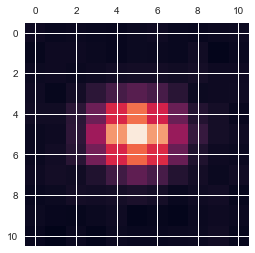

In [339]:
plt.matshow(datas[3])

In [340]:
data_fits = pd.DataFrame([get_opt_params(d) for d in datas])

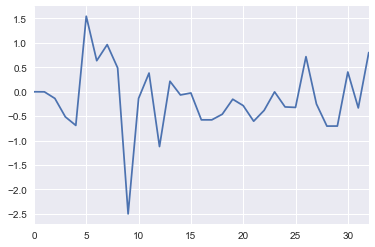

In [341]:
(data_fits.z0 - np.linspace(-20, 20, 33)).plot()

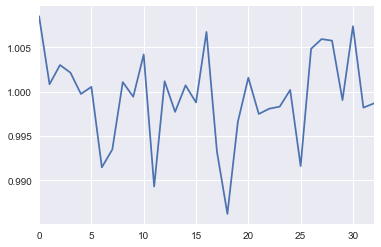

In [318]:
data_fits.amp.plot()

In [293]:
g2 = Gauss2Dz(datas[10], zcalib["ls"][11])

In [294]:
g2.optimize_params()

array([  1.00621807e+00,   4.99835077e+00,   4.99344092e+00,
        -7.32704647e+00,  -1.75350404e-04])

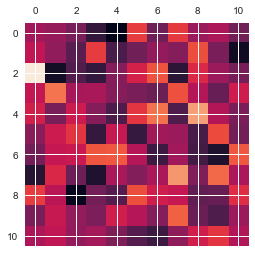

In [295]:
plt.matshow(g2.fit_model-g2.data)